In [43]:
#  Add root folder to python path
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

# Add some common packages
import numpy as np
import pandas as pd
import math
import scipy.stats as ss
from matplotlib import pyplot as plt
from lifelines import WeibullFitter
from tqdm.auto import tqdm


In [44]:
from pof.distribution import Distribution

### Checking the distribution is working

As the number 

In [45]:
dist = Distribution(alpha = 100, beta=1, gamma= 10)

100%|██████████| 100/100 [00:43<00:00,  2.30it/s]


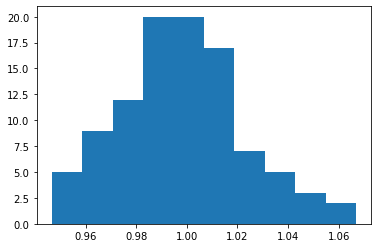

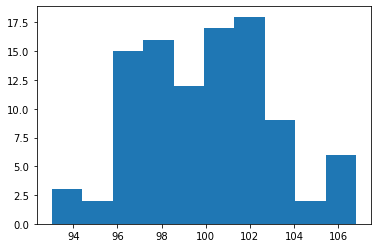

In [61]:
rho_ = []
lambda_ = []
wbf = WeibullFitter()

for i in tqdm(range(100)):

    events = dist.sample(1000)
    events = np.round(events - dist.gamma)
    events[events <= 0] = 0.25

    wbf.fit(events)

    rho_.append(wbf.rho_)
    lambda_.append(wbf.lambda_)

    #print(f"Alpha: {wbf.rho_}, Beta: {wbf.lambda_}")

plt.hist(rho_)
plt.show()
plt.hist(lambda_)
plt.show()

In [38]:
%%timeit

update = ["alpha", "gamma"]

for key, value in dist.__dict__.items():
    if key in update:
        dist.__dict__[key]


856 ns ± 61.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [39]:
%%timeit

update = ["alpha", "gamma"]

for key in update:
    dist.__dict__[key]


KeyError: 'alpha'